In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hydrant.topology.geom as gm
import hydrant.mizuRoute.mizuRoute as mz
import subprocess
import os
from   shapely.geometry import Point

In [2]:
# inputs
path_out = './output/'
codes = ['7020014250'] # Colombia
path_riv= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/'
path_cat= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/'
riv_file_template= '*-streamnet-gpkg'
cat_file_template= '*-basins-gpkg'

In [3]:
if not os.path.isdir(path_out):
    os.makedirs(path_out)

In [4]:
riv, cat = gm.tdx_read_file(codes = ['7020014250'],
                            path_riv= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/',
                            riv_file_template= '*-streamnet-gpkg',
                            path_cat= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/',
                            cat_file_template= '*-basins-gpkg')

In [7]:
riv, cat = gm.prepare_ntopo(riv=riv,\
                            riv_cols={'id':'LINKNO', 'next_id':'DSLINKNO'},\
                            cat=cat,\
                            cat_cols={'id':'streamID', 'hillslope':'hillslope', 'area' :'area'},\
                            network = 'tdx')

In [8]:
# set the case name
prefix = 'Fraser_tdx_'

In [9]:
# slice the domain for various stations and their seg ID
cat_slice, riv_slice = gm.subset_ntopo(cat=cat,\
                                       cat_cols={'id':'streamID'},\
                                       riv=riv,\
                                       riv_cols={'id':'LINKNO', 'next_id':'DSLINKNO'},\
                                       outlet_id=[217371]) # segment that is aimed to make the subbasin for

<AxesSubplot:>

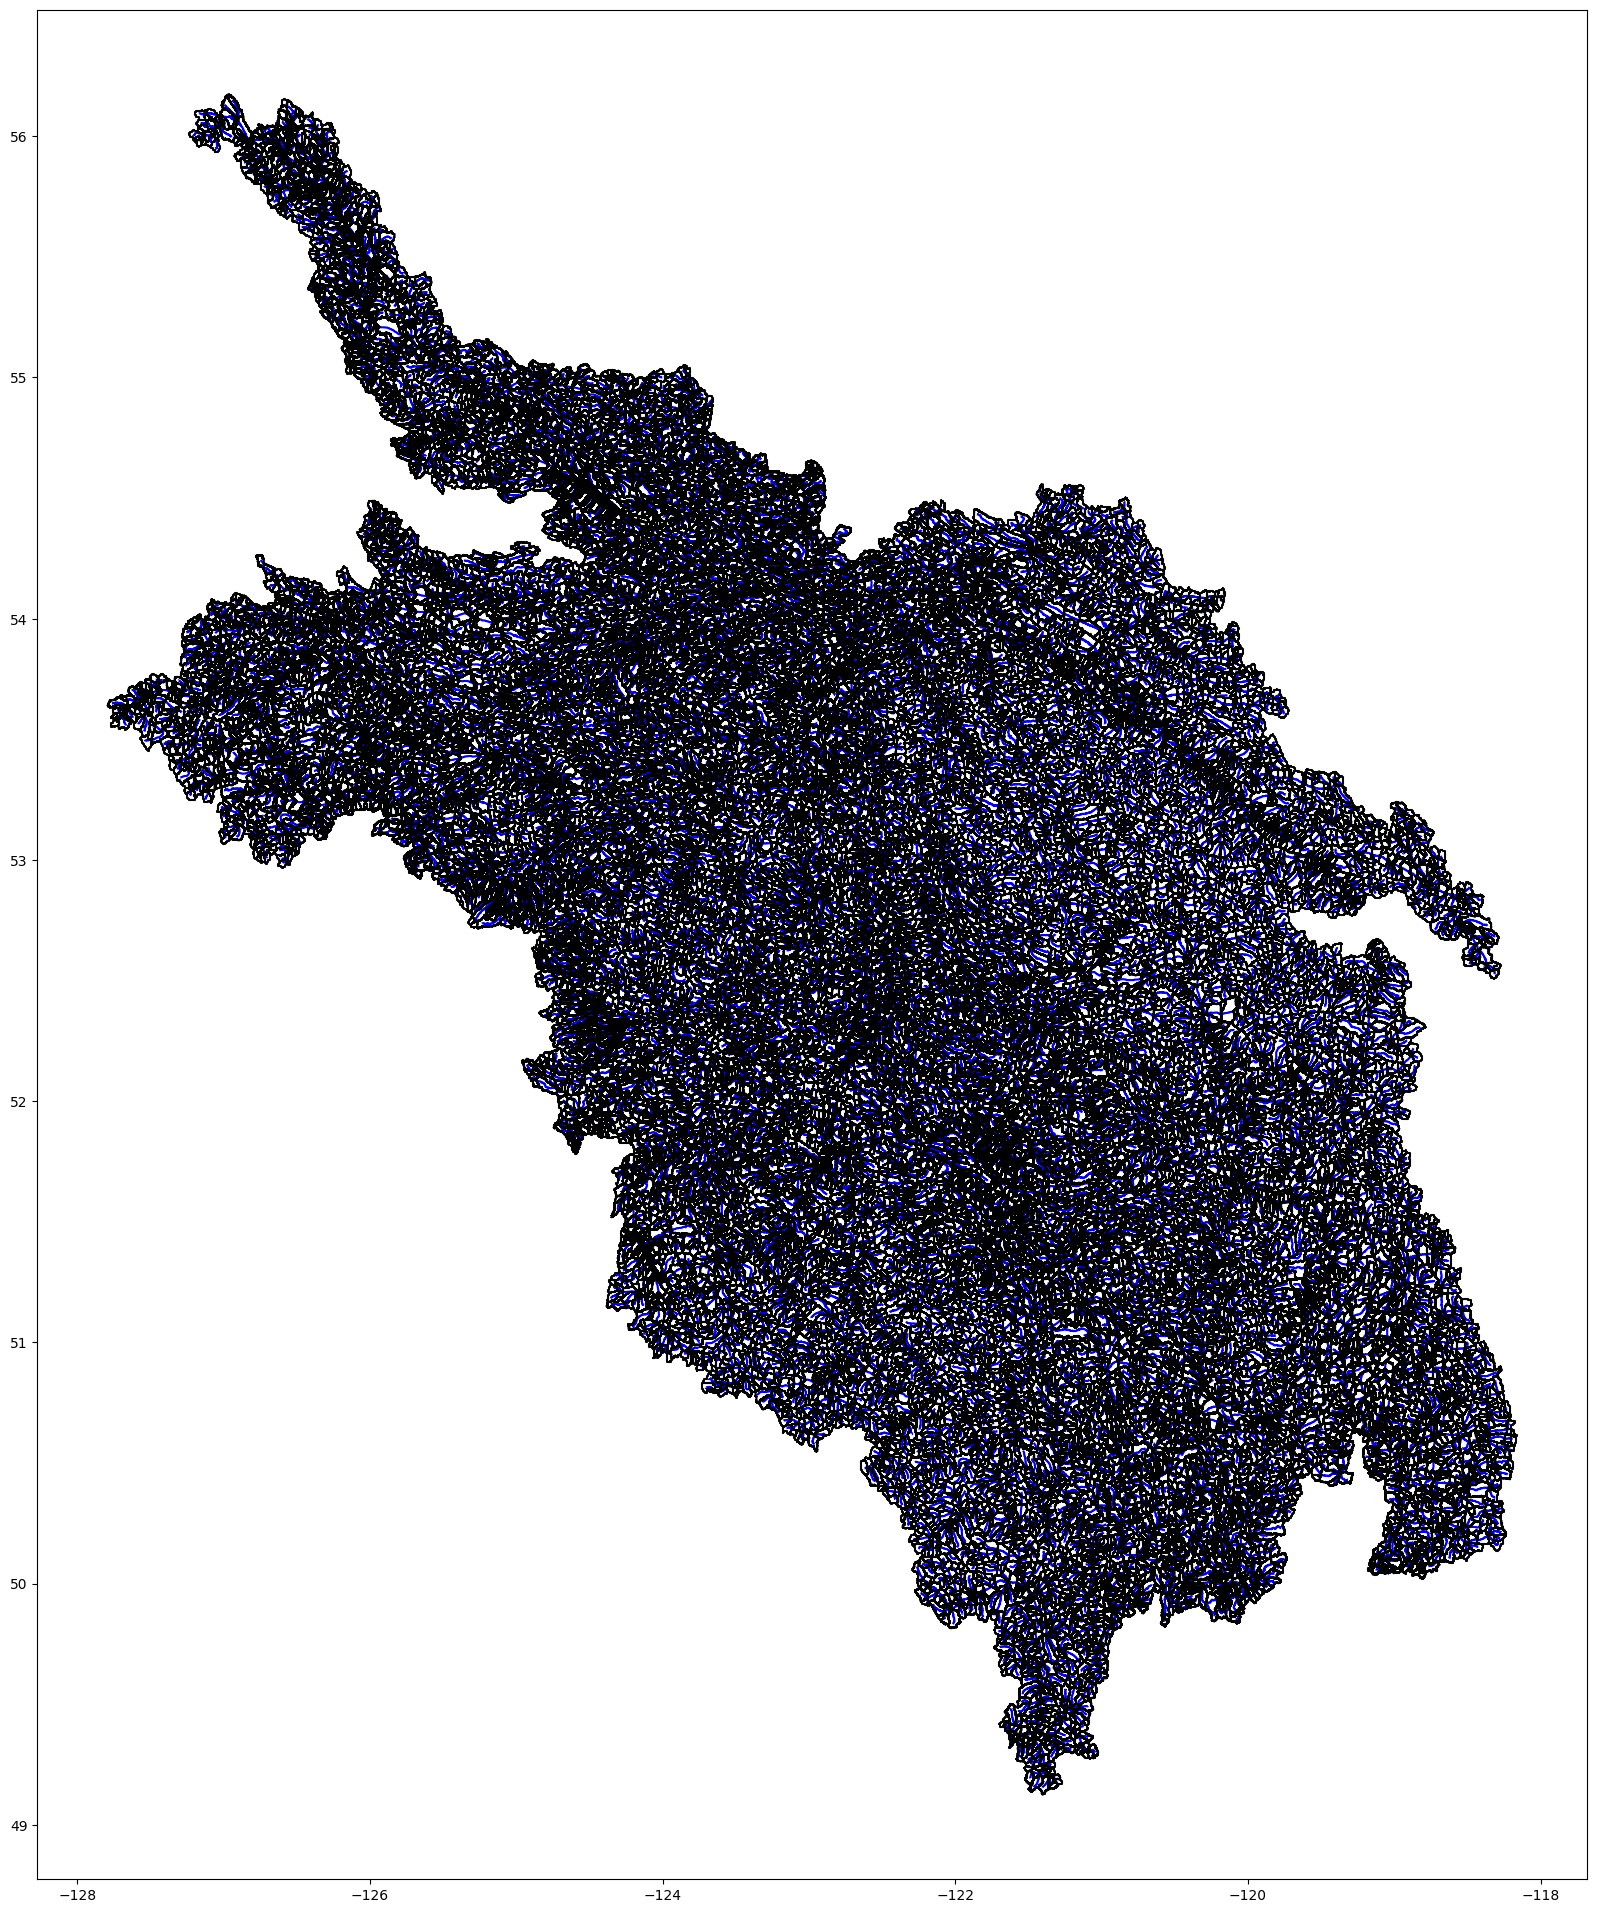

In [10]:
fig, ax = plt.subplots(figsize=(20,30))
riv_slice.plot(ax=ax, color='b')
cat_slice.boundary.plot(ax=ax, color='k')

In [11]:
cat_slice.to_file(path_out+prefix+'cat.shp')
riv_slice.to_file(path_out+prefix+'riv.shp')